In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import train, RNN, FittedRNN, OneDimEquivalent
import plotter as pt

from pydoc import help

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [2]:
help(pt)

Help on module plotter:

NAME
    plotter

FUNCTIONS
    plot_input_range(model, f_in_vec, in_params, num_repeat=10, alpha=0, figsize=(8, 6), cmap_str='turbo', background='grey', linewidth=2.0)
    
    plot_network_in_ax1_ax2(model, f_in_vec, in_params, ax1_str, ax2_str, num_repeat=10, figsize=(8, 6), alpha=0, background='grey', linewidth=2.5)
    
    plot_neuron_states(model, u, y, figsize=(8, 6), alpha=0.5, apply_activation=False, plot_by='', linewidth=1.5)
        The weights are normalized by their max absolute value and used to control
        the alpha parameter of each line.
        
        Param:
        plot_by
            'weight' - Colors neurons with positive weights blue and negative red
            'adj_weight' - Each neuron is multiplied by the sign of its weight.
    
    plot_scatter(x, y, xlabel='', ylabel='', figsize=(5, 5))
    
    visCov(model, figsize=(8, 8), fontsize=20, cmap='bwr', flip_m_n=False)
        Visualize the modified triangular covariance matrix o

In [3]:
sd_dataset = SingleDecisionDataset(16000)
train_dataloader = DataLoader(sd_dataset, batch_size=32)

model = RNN()
train(train_dataloader, model, device)

loss: 0.999061  [   32/16000]
loss: 0.486252  [ 3232/16000]
loss: 0.000286  [ 6432/16000]
loss: 0.000146  [ 9632/16000]
loss: 0.000186  [12832/16000]


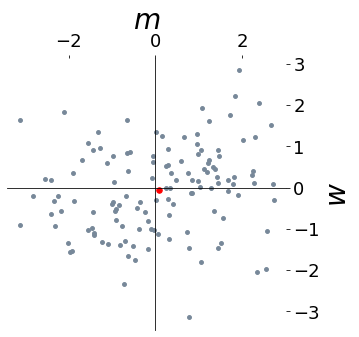

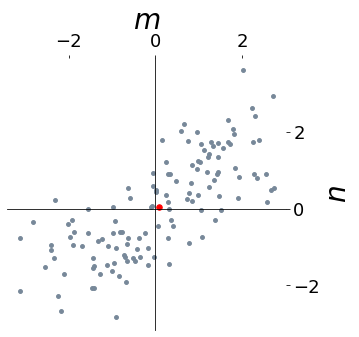

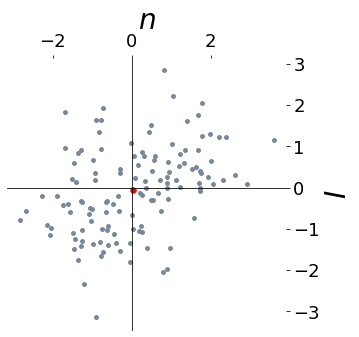

In [4]:
SMALL_SIZE = 18
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

m = model.m.detach().numpy().squeeze()
n = model.n.detach().numpy().squeeze()
wi = model.wi.detach().numpy().squeeze()
w = model.wi.detach().numpy().squeeze()
    
pt.plot_scatter(m, w, xlabel="$m$", ylabel="$w$")
    
pt.plot_scatter(m, n, xlabel="$m$", ylabel="$n$")

pt.plot_scatter(n, wi, xlabel="$n$", ylabel="$I$")

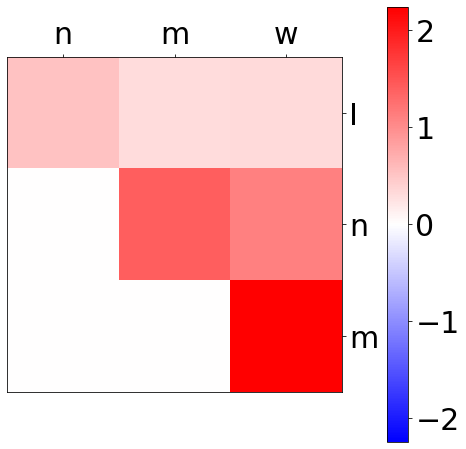

In [5]:
SMALL_SIZE = 30
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

pt.visCov(model, flip_m_n=False)

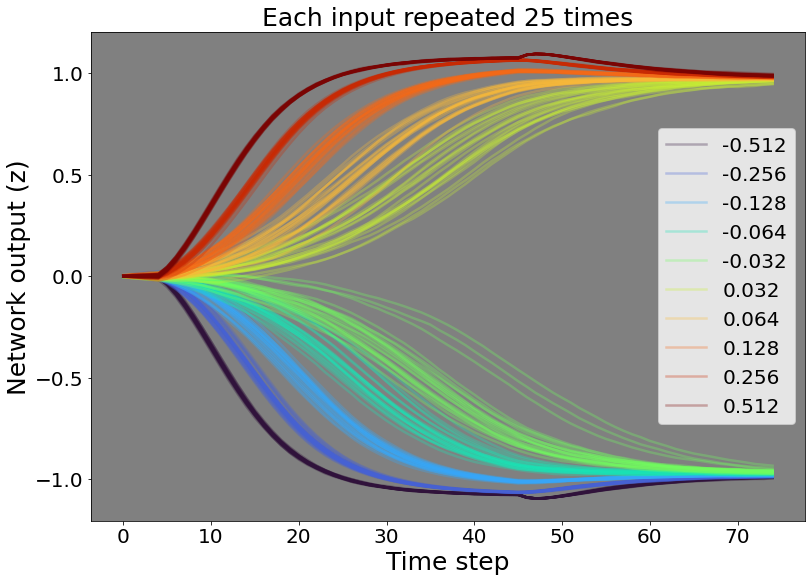

In [6]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

pt.plot_input_range(model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

-0.512
-0.256
-0.128
-0.064
-0.032
0.032
0.064
0.128
0.256
0.512


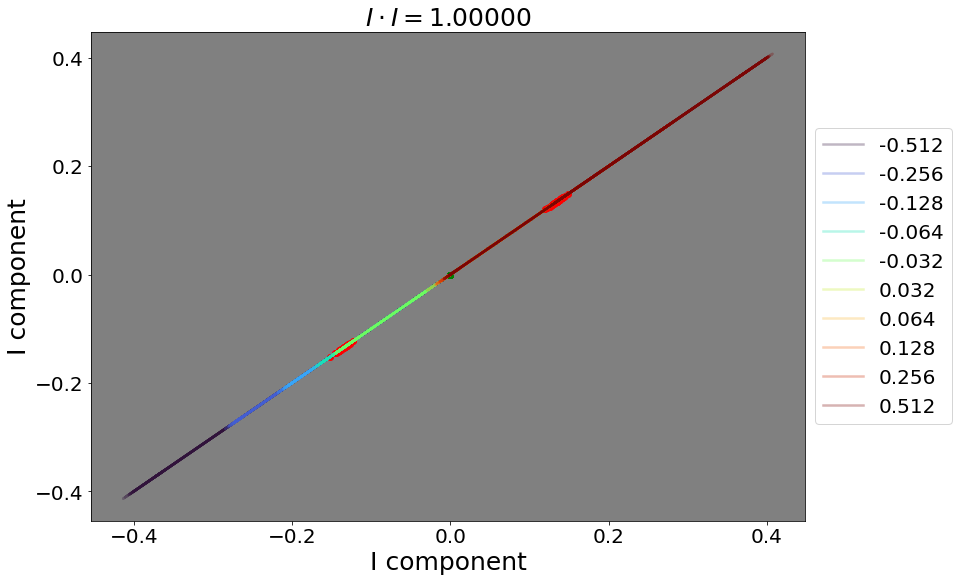

In [8]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

pt.plot_network_in_ax1_ax2(model, 
                    single_decision,  
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]), 
                    "I", "",
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

In [8]:
fit_model = FittedRNN(model)

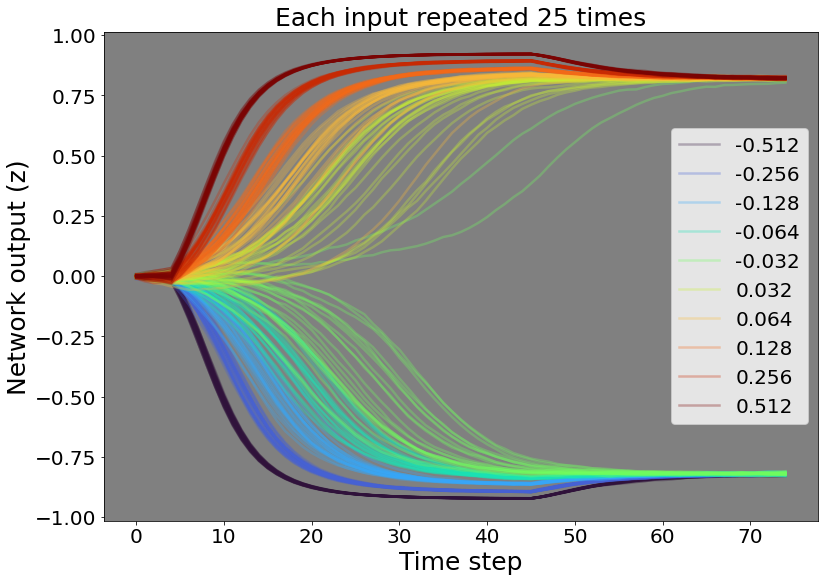

AttributeError: module 'plotter' has no attribute 'plot_network_in_m_i'

In [9]:
pt.plot_input_range(fit_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

pt.plot_network_in_m_i(fit_model, 
                    single_decision, 
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]), 
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

In [24]:
dim_model = OneDimEquivalent(model)

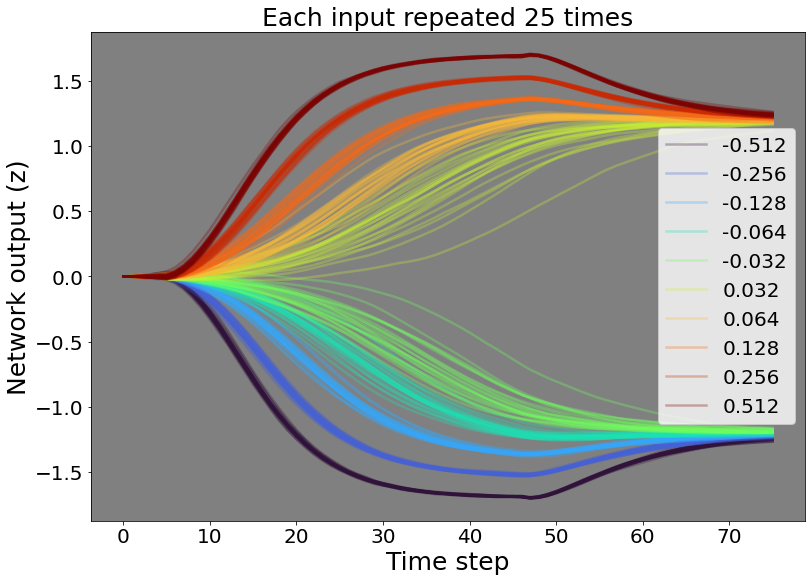

In [25]:
pt.plot_input_range(dim_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)